## 2-4

In [33]:
# 2-4
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

a0 = -2
a1 = -1
a2 = 2
A = np.array([[0,  1,  0],
              [0,  0,  1],
              [-a0,-a1,-a2]])

eigvals, eigvecs = np.linalg.eig(A)
print("eigvals are: ", eigvals)    
#-------------------------------------------------
order = 3
# I.C.
d1 = np.array([1,1,1])
d2 = np.array([1,-1,1])
# ODE constant
c1 = np.zeros(order)
c2 = np.zeros(order)

m = np.zeros((order,order))
for row in range(order):
    for column in range(len(eigvals)):
        m[row][column] = eigvals[column] ** row

# d = m @ c
minv = inv(m)
c1 = minv@d1
c2 = minv@d2
print("m=", m)
print("c1=", c1)
print("c2=", c2)
#-------------------------------------------------

eigvals are:  [-2. -1.  1.]
m= [[ 1.  1.  1.]
 [-2. -1.  1.]
 [ 4.  1.  1.]]
c1= [0. 0. 1.]
c2= [ 1.11022302e-16  1.00000000e+00 -2.77555756e-17]


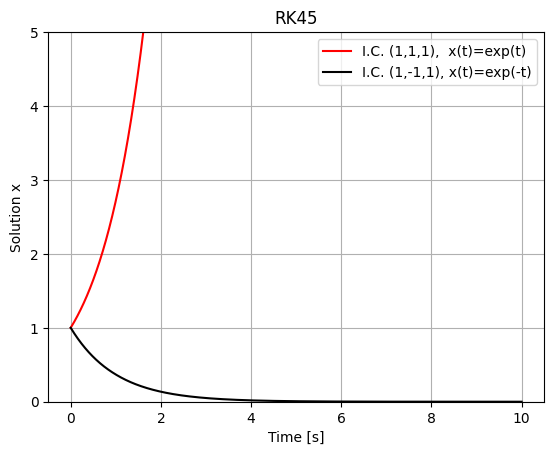

In [52]:
# define time base and initial condition
t = np.linspace(0, 10, 1000)
y0 = np.array([1,1,1])
y1 = np.array([1,-1,1])

a0 = -2
a1 = -1
a2 = 2
A = np.array([[0,  1,  0],
              [0,  0,  1],
              [-a0,-a1,-a2]])

def linear_ode(t, y):
    return A @ y

linear_ode_solution_0 = solve_ivp(linear_ode, (0, 10), y0, t_eval=t)
linear_ode_solution_1 = solve_ivp(linear_ode, (0, 10), y1, t_eval=t)
y0 = linear_ode_solution_0.y
y1 = linear_ode_solution_1.y

plt.figure()
plt.plot(t, y0[0, :], 'r')
plt.plot(t, y1[0, :], 'k')
plt.ylim(0,5)
plt.title('RK45')
plt.xlabel('Time [s]')
plt.ylabel('Solution x')
plt.legend(['I.C. (1,1,1),  x(t)=exp(t)', 'I.C. (1,-1,1), x(t)=exp(-t)'])
plt.grid(True)
plt.show()

## 2-5 (d)

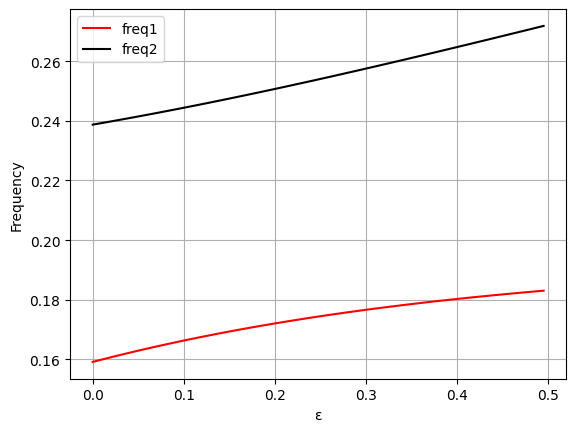

In [4]:
# 2-5 (d)
import numpy as np
from matplotlib import pyplot as plt
w1 = 1
w2 = 1.5

increment = 0.005
steps     = int(0.5/increment)
ep        = np.arange(0, 0.5, increment)

freq1 = np.zeros(steps)
freq2 = np.zeros(steps)
'''
d/dt[θ] = A [θ]
λ = a + ib
freq = b / 2π
'''
for i in range(steps):
    A = np.array([[0,            1,  0,            0],
                  [-w1**2-ep[i], 0,  ep[i],        0],
                  [0,            0,  0,            1],
                  [ep[i],        0,  -w2**2-ep[i], 0]])

    eigvals, eigvecs = np.linalg.eig(A)
    freq1[i] = np.abs(eigvals.imag[0])/(2*np.pi)
    freq2[i] = np.abs(eigvals.imag[2])/(2*np.pi)

plt.figure()
plt.plot(ep, freq1, 'r')     
plt.plot(ep, freq2, 'k')
plt.legend(['freq1','freq2'])
plt.xlabel('\u03B5')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()   